In [202]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FixedLocator, FixedFormatter, LogLocator, NullFormatter, LogFormatter, EngFormatter, AutoMinorLocator)
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import struct
%matplotlib inline

# Defaults more suitable for 4K monitors
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = [6.0, 4.0]

# Export settings
mpl.rcParams["savefig.bbox"] = 'tight'
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.facecolor"] = 'white'

# Lossless using WebP
#mpl.rcParams["animation.codec"] = 'webp'
#mpl.rcParams["animation.ffmpeg_args"] = ["-preset", "drawing", "-lossless", "1"]
# Use anim.save("movie.webp", fps=60)

# Lossy using AV1
mpl.rcParams["animation.codec"] = 'libaom-av1'
mpl.rcParams["animation.ffmpeg_args"] = []
# Use anim.save("movie.webm", fps=60)


In [164]:
df = pd.concat([
    pd.read_csv('results/hpc6a/blst/run1.csv'),
    pd.read_csv('results/hpc6a/blst/run2.csv'),
    pd.read_csv('results/hpc6a/blst/run3.csv'),
    pd.read_csv('results/hpc6a/blst/run4.csv'),
    pd.read_csv('results/hpc6a/blst/run5.csv'),
])

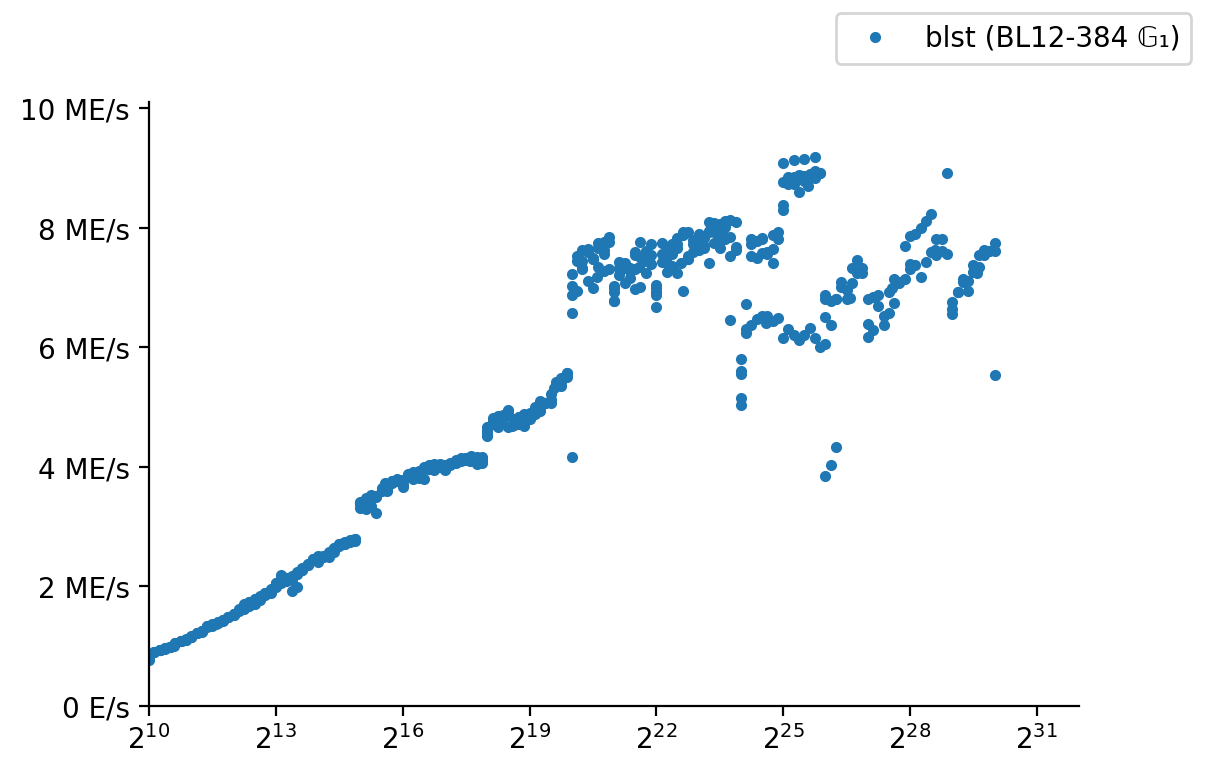

In [165]:
fig, ax = plt.subplots()

ax.plot(df['size'], df['throughput'], marker='.', linestyle='none', label='blst (BL12-384 𝔾₁)')

ax.set_clip_on(False)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xlim((2**10, 2**32))
ax.set_xscale('log')
ax.xaxis.set_major_formatter(FixedFormatter(["2¹⁰", "2¹²", "2¹⁴", "2¹⁶", "2¹⁸", "2²⁰", "2²²", "2²⁴", "2²⁶", "2²⁸", "2³⁰", "2³²"]))
ax.xaxis.set_major_locator(FixedLocator([2**i for i in range(10,33,2)]))
ax.xaxis.set_minor_formatter(NullFormatter())
ax.xaxis.set_minor_locator(FixedLocator([2**i for i in range(10,33)]))

ax.set_ylim((0, 1.1 * max(df['throughput'])))
ax.yaxis.set_major_formatter(EngFormatter(unit='E/s'))
#ax.yaxis.set_major_locator(MultipleLocator(0.2e6))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1e6))

fig.legend()


In [240]:
machine = 'm1-max'

df_blst = pd.concat([
    pd.read_csv(f'results/m1-max/blst/run1.csv'),
    pd.read_csv(f'results/m1-max/blst/run2.csv'),
])
df_plonky2_ps = pd.concat([
    pd.read_csv(f'results/m1-max/plonky2-poseidon/run1.csv'),
    pd.read_csv(f'results/m1-max/plonky2-poseidon/run2.csv'),
    pd.read_csv(f'results/m1-max/plonky2-poseidon/run3.csv'),
])
df_plonky2_k = pd.concat([
    pd.read_csv(f'results/m1-max/plonky2-keccak/run1.csv'),
    pd.read_csv(f'results/m1-max/plonky2-keccak/run2.csv'),
    pd.read_csv(f'results/m1-max/plonky2-keccak/run3.csv'),
])

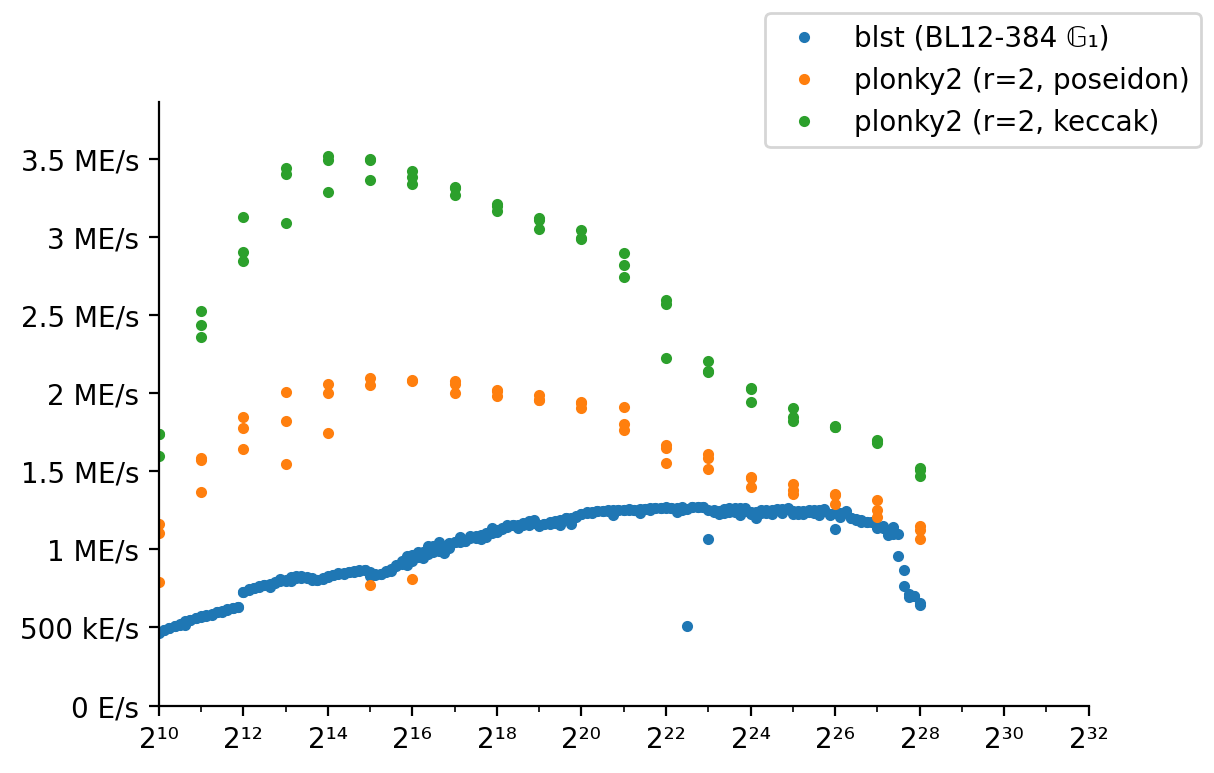

In [241]:
fig, ax = plt.subplots()

ax.plot(df_blst['size'], df_blst['throughput'], marker='.', linestyle='none', label='blst (BL12-384 𝔾₁)')
ax.plot(df_plonky2_ps['size'], df_plonky2_ps['throughput'], marker='.', linestyle='none', label='plonky2 (r=2, poseidon)')
ax.plot(df_plonky2_k['size'], df_plonky2_k['throughput'], marker='.', linestyle='none', label='plonky2 (r=2, keccak)')

ax.set_clip_on(False)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.set_xlim((2**10, 2**32))
ax.set_xscale('log')
ax.xaxis.set_major_locator(FixedLocator([2**i for i in range(10,33,2)]))
ax.xaxis.set_major_formatter(FixedFormatter(["2¹⁰", "2¹²", "2¹⁴", "2¹⁶", "2¹⁸", "2²⁰", "2²²", "2²⁴", "2²⁶", "2²⁸", "2³⁰", "2³²"]))
ax.xaxis.set_minor_locator(FixedLocator([2**i for i in range(10,33)]))
ax.xaxis.set_minor_formatter(NullFormatter())

ax.set_ylim((0, 1.1 * max(max(df_blst['throughput']), max(df_plonky2_k['throughput']))))
ax.yaxis.set_major_formatter(EngFormatter(unit='E/s'))
#ax.yaxis.set_major_locator(MultipleLocator(0.2e6))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1e6))

fig.legend()